# > **Dry Beans Classification**

**Data fields**
* ID - an ID for this instance
* Area - (A), The area of a bean zone and the number of pixels within its boundaries.
* Perimeter - (P), Bean circumference is defined as the length of its border.
* MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
* MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
* AspectRatio - (K), Defines the relationship between L and l.
* Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
* ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
* EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.
* Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.
* Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
* Roundness - (R), Calculated with the following formula: (4piA)/(P^2)
* Compactness - (CO), Measures the roundness of an object: Ed/L
* ShapeFactor1 - (SF1)
* ShapeFactor2 - (SF2)
* ShapeFactor3 - (SF3)
* ShapeFactor4 - (SF4)
* y - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

# > **IMPORT LIBERIRES AND READ THE DATA**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error 
from sklearn.metrics import mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


df = pd.read_csv('../input/dry-beans-classification-iti-ai-pro-intake01/train.csv')
test_df = pd.read_csv('../input/dry-beans-classification-iti-ai-pro-intake01/test.csv')
print("The Shape of the train_dataSet is {}.\n".format(df.shape))
print("The Shape of the test_dataSet is {}.\n".format(test_df.shape))
df.head()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The Shape of the train_dataSet is (10834, 18).

The Shape of the test_dataSet is (2709, 17).



,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


# > **EDA**

In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10834.0,5416.500000,3127.650742,0.000000,2708.250000,5416.500000,8124.750000,10833.000000
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [4]:
df.isnull().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

In [5]:
df.isna().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

In [6]:
df[df.duplicated()].count()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

# > ****PREPROCESSING****

In [7]:
df['y']=df['y'].astype('category')

In [8]:
le=LabelEncoder()
df['y']=le.fit_transform(df['y'])
df['y']

0        4
1        5
2        3
3        3
4        6
        ..
10829    5
10830    3
10831    2
10832    6
10833    3
Name: y, Length: 10834, dtype: int64

# > **DATA VISUALIZATION**

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>],
       [<AxesSubplot:title={'center':'MinorAxisLength'}>,
        <AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>],
       [<AxesSubplot:title={'center':'EquivDiameter'}>,
        <AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>],
       [<AxesSubplot:title={'center':'Compactness'}>,
        <AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>],
       [<AxesSubplot:title={'center':'ShapeFactor4'}>,
        <AxesSubplot:title={'center':'y'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype

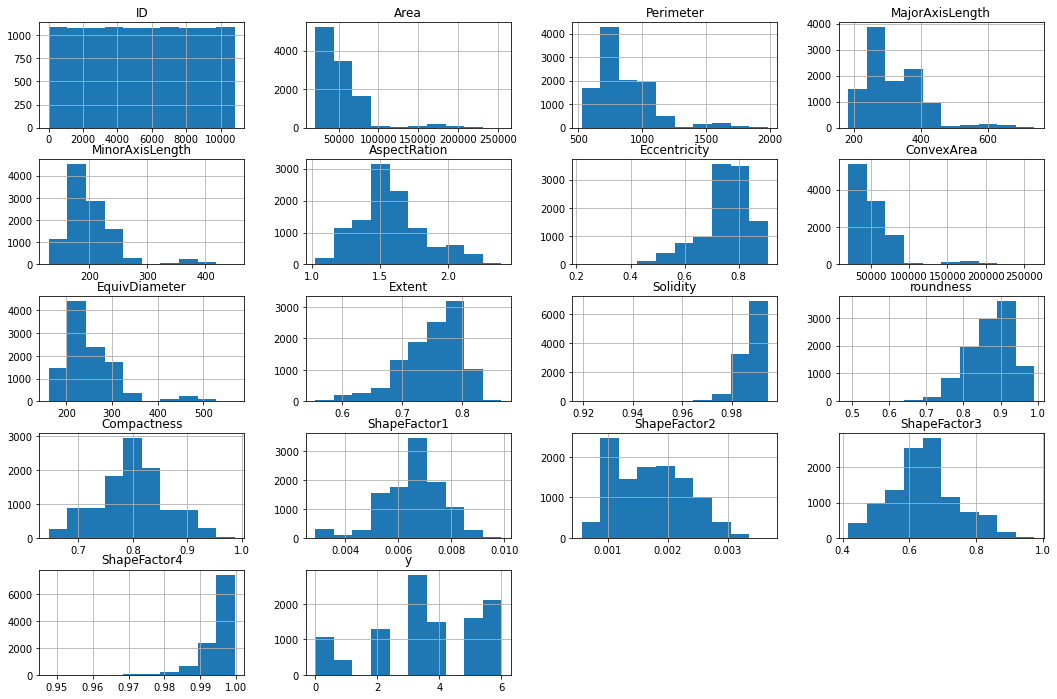

In [9]:
df.hist(figsize=[18,12])

<AxesSubplot:>

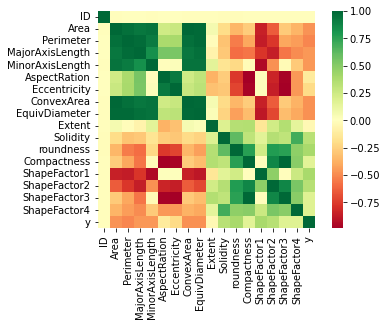

In [10]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

<AxesSubplot:>

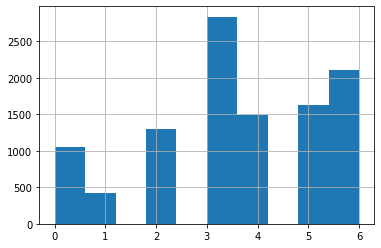

In [11]:
df['y'].hist()

<AxesSubplot:xlabel='y', ylabel='Density'>

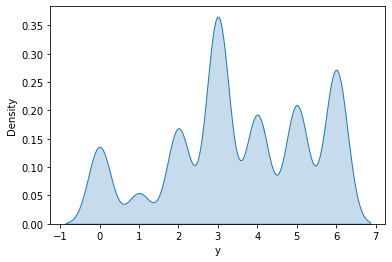

In [12]:
sns.kdeplot(df['y'], shade=True)

# > **FEATURE ENGINNERING**

In [13]:
df['frist']=(df['ShapeFactor1']*df['roundness']+df['ShapeFactor2']*df['roundness'])/df['Extent']

In [14]:
df['second']=df['AspectRation']*df['roundness']*df['ShapeFactor1']+df['ShapeFactor2']

In [15]:
df['third']=(df['roundness']*df['Solidity']*df['ShapeFactor1']**0.5+df['ShapeFactor2']*df['roundness']*df['Solidity'])/df['Extent']

In [16]:
df['four']=((df['ShapeFactor1']**2)*df['AspectRation']+df['ShapeFactor2']*df['roundness'])*df['roundness']/df['Extent']

In [17]:
df['five']=(df['frist']**0.5+df['third']**0.5+df['second']**0.5+df['four']**0.5)*df['roundness']**0.5

# > **FEATURES CORRELATION**

In [18]:
corr_matrix=df.corr()
(corr_matrix['y'].sort_values(ascending=False))

y                  1.000000
five               0.511241
third              0.475409
frist              0.453392
second             0.409741
ShapeFactor1       0.392398
roundness          0.387003
four               0.383107
ShapeFactor2       0.338889
Solidity           0.327622
ShapeFactor4       0.172578
ShapeFactor3       0.172462
Compactness        0.161121
ID                -0.001609
Extent            -0.034010
AspectRation      -0.121283
Eccentricity      -0.204183
MajorAxisLength   -0.456807
MinorAxisLength   -0.457526
Area              -0.474164
ConvexArea        -0.476363
EquivDiameter     -0.480921
Perimeter         -0.507765
Name: y, dtype: float64

In [19]:
df.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y', 'frist', 'second', 'third', 'four',
       'five'],
      dtype='object')

# > **FEATURES SELECTION FOR TRAINING**

In [20]:
X=df.drop(['ID','y', 'Area','Perimeter','EquivDiameter','MajorAxisLength','MinorAxisLength','second','four','frist','third'], axis=1)  #,'second','third','four'
y=df['y']

In [21]:
X.columns

Index(['AspectRation', 'Eccentricity', 'ConvexArea', 'Extent', 'Solidity',
       'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'five'],
      dtype='object')

# > **SPLIT THE TRAINING DATA**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# > **MACHINE LEARNING MODELS**

In [24]:
from sklearn.neural_network import MLPClassifier
r5=MLPClassifier(max_iter=500)
r5.fit(X_train, y_train)
r5_pred = r5.predict(X_test)

scores = cross_val_score(r5, X, y, cv=5)
print(scores.mean())
print ('ROC AUC: %0.3f' % r5.score(X, y) )

print('train_score:'+str(r5.score(X_train, y_train)))
print('test_score:'+str(r5.score(X_test, y_test)))
print ('MSE:' + str(np.sqrt(mean_squared_error ( r5_pred , y_test) ))) 
print ('RMSLE:' + str(np.sqrt(mean_squared_log_error ( r5_pred , y_test) )))

0.14694504702238437
ROC AUC: 0.039
train_score:0.943232952578747
test_score:0.9317028149515459
MSE:0.776025156705251
RMSLE:0.21971104169948402


In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, r5_pred))
print(classification_report(y_test, r5_pred))

[[194   0  11   0   3   2   1]
 [  0  84   0   0   0   0   0]
 [  8   0 247   0   4   0   2]
 [  0   0   0 537   0   5  25]
 [  2   0   4   6 283   0   3]
 [  2   0   0   4   0 312   6]
 [  6   0   2  44   4   4 362]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       211
           1       1.00      1.00      1.00        84
           2       0.94      0.95      0.94       261
           3       0.91      0.95      0.93       567
           4       0.96      0.95      0.96       298
           5       0.97      0.96      0.96       324
           6       0.91      0.86      0.88       422

    accuracy                           0.93      2167
   macro avg       0.94      0.94      0.94      2167
weighted avg       0.93      0.93      0.93      2167



In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
#Fit the trained model
rf.fit(X_train,y_train)

#Cross validation prediction
rf_pred=rf.predict(X_test)
print(rf_pred.shape)

scores = cross_val_score(rf, X, y, cv=5)
print(scores.mean())
print ('ROC AUC: %0.3f' % rf.score(X, y) )

print('train_score:'+str(rf.score(X_train, y_train)))
print('test_score:'+str(rf.score(X_test, y_test)))
print ('MSE:' + str(np.sqrt(mean_squared_error ( rf_pred , y_test) ))) 
print ('RMSLE:' + str(np.sqrt(mean_squared_log_error ( rf_pred , y_test) )))

(2167,)
0.9236658668749449
ROC AUC: 0.150
train_score:1.0
test_score:0.9307798800184587
MSE:0.7372982270346043
RMSLE:0.19430341611771385


In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[192   0  14   0   1   3   1]
 [  0  84   0   0   0   0   0]
 [  5   0 250   0   4   0   2]
 [  0   0   0 532   0   5  30]
 [  0   0   2   4 287   0   5]
 [  1   0   0   6   0 308   9]
 [  2   0   3  46   2   5 364]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       211
           1       1.00      1.00      1.00        84
           2       0.93      0.96      0.94       261
           3       0.90      0.94      0.92       567
           4       0.98      0.96      0.97       298
           5       0.96      0.95      0.96       324
           6       0.89      0.86      0.87       422

    accuracy                           0.93      2167
   macro avg       0.95      0.94      0.94      2167
weighted avg       0.93      0.93      0.93      2167



In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
#Cross validation prediction
knn_pred=knn.predict(X_test)
print(knn_pred.shape)

scores = cross_val_score(knn, X, y, cv=5)
print(scores.mean())
print ('ROC AUC: %0.3f' % knn.score(X, y) )

print('train_score:'+str(knn.score(X_train, y_train)))
print('test_score:'+str(knn.score(X_test, y_test)))
print ('MSE:' + str(np.sqrt(mean_squared_error ( knn_pred , y_test) ))) 
print ('RMSLE:' + str(np.sqrt(mean_squared_log_error ( knn_pred , y_test) )))

(2167,)
0.5917488083018125
ROC AUC: 0.039
train_score:0.9353871004961347
test_score:0.9229349330872173
MSE:0.7769166275985089
RMSLE:0.21146723149482238


In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

#Cross validation prediction
dt_pred=dt.predict(X_test)
print(dt_pred.shape)

scores = cross_val_score(dt, X, y, cv=5)
print(scores.mean())
print ('ROC AUC: %0.3f' % dt.score(X, y) )

print('train_score:'+str(dt.score(X_train, y_train)))
print('test_score:'+str(dt.score(X_test, y_test)))
print ('MSE:' + str(np.sqrt(mean_squared_error ( dt_pred , y_test) ))) 
print ('RMSLE:' + str(np.sqrt(mean_squared_log_error ( dt_pred , y_test) )))

(2167,)
0.8920986798962529
ROC AUC: 0.150
train_score:1.0
test_score:0.8883248730964467
MSE:0.9697786844511868
RMSLE:0.2640678278065123


In [30]:
from sklearn.naive_bayes import GaussianNB
gs = GaussianNB()
gs.fit(X_train,y_train)

#Cross validation prediction
gs_pred=gs.predict(X_test)
print(gs_pred.shape)

scores = cross_val_score(gs, X, y, cv=5)
print(scores.mean())
print ('ROC AUC: %0.3f' % gs.score(X, y) )

print('train_score:'+str(gs.score(X_train, y_train)))
print('test_score:'+str(gs.score(X_test, y_test)))
print ('MSE:' + str(np.sqrt(mean_squared_error ( gs_pred , y_test) ))) 
print ('RMSLE:' + str(np.sqrt(mean_squared_log_error ( gs_pred , y_test) )))

(2167,)
0.657097885217744
ROC AUC: 0.039
train_score:0.8921195338640822
test_score:0.9021688970927549
MSE:0.8353076136453781
RMSLE:0.24975373973297002


In [31]:
from xgboost.sklearn import XGBClassifier
xg = XGBClassifier(learning_rate=0.01 ,
                                        n_estimators=900,
                                        max_depth=5,
                                        subsample=1,
                                        colsample_bytree=1,
                                        gamma=6,
                                        reg_alpha = 14,
                                        reg_lambda = 3)
xg.fit(X_train,y_train)

#Cross validation prediction
xg_pred=xg.predict(X_test)
print(xg_pred.shape)

scores = cross_val_score(xg, X, y, cv=5)
print(scores.mean())
print ('ROC AUC: %0.3f' % xg.score(X, y) )

print('train_score:'+str(xg.score(X_train, y_train)))
print('test_score:'+str(xg.score(X_test, y_test)))
print ('MSE:' + str(np.sqrt(mean_squared_error ( xg_pred , y_test) ))) 
print ('RMSLE:' + str(np.sqrt(mean_squared_log_error ( xg_pred , y_test) )))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:04:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(2167,)
[02:05:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:06:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:08:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:09:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [32]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)

#Cross validation prediction
sv_pred=sv.predict(X_test)
print(sv_pred.shape)

scores = cross_val_score(sv, X, y, cv=5)
print(scores.mean())
print ('ROC AUC: %0.3f' % sv.score(X, y) )

print('train_score:'+str(sv.score(X_train, y_train)))
print('test_score:'+str(sv.score(X_test, y_test)))
print ('MSE:' + str(np.sqrt(mean_squared_error ( sv_pred , y_test) ))) 
print ('RMSLE:' + str(np.sqrt(mean_squared_log_error ( sv_pred , y_test) )))

(2167,)
0.6330991907914445
ROC AUC: 0.137
train_score:0.9314641744548287
test_score:0.936317489616982
MSE:0.7046552305921833
RMSLE:0.1881036812490118


In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, sv_pred))
print(classification_report(y_test, sv_pred))

[[194   0  13   0   1   2   1]
 [  0  84   0   0   0   0   0]
 [  5   0 252   0   3   0   1]
 [  0   0   0 529   0   5  33]
 [  0   0   2   3 288   0   5]
 [  2   0   0   4   0 307  11]
 [  2   0   2  37   2   4 375]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       211
           1       1.00      1.00      1.00        84
           2       0.94      0.97      0.95       261
           3       0.92      0.93      0.93       567
           4       0.98      0.97      0.97       298
           5       0.97      0.95      0.96       324
           6       0.88      0.89      0.88       422

    accuracy                           0.94      2167
   macro avg       0.95      0.95      0.95      2167
weighted avg       0.94      0.94      0.94      2167



# > **VOTING ENSEMBLE**

In [34]:
from sklearn.ensemble import VotingClassifier
classifier = VotingClassifier(estimators=[('r5', r5),('rf', rf),('sv', sv),('xg', xg),('knn', knn)])          #,voting='soft'

classifier.fit(X_train, y_train)
#class_pred = classifier.predict(test_df)

accuracies = cross_val_score(classifier, X, y , cv = 5)
print("5 fold cross validation accuracies {}".format(accuracies.mean()))
print ('ROC AUC: %0.3f' % classifier.score(X, y) )

print('train_score:'+str(classifier.score(X_train, y_train)))
print('test_score:'+str(classifier.score(X_test, y_test)))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:10:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:11:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:12:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:13:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:15:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:16:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
5 fold cross validation accuracies 0.8469634119788092
ROC AUC: 0.039
train_score:0.9450790354217146
test_score:0.9381633594831564


# > **CHECK FOR TEST DATASET**

In [35]:
test_df

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,13538,66833,1018.336,400.397077,214.346215,1.867992,0.844640,67787,291.709476,0.759604,0.985927,0.809876,0.728550,0.005991,0.001041,0.530786,0.991504
2705,13539,40572,725.331,250.714014,206.471935,1.214276,0.567264,40900,227.283688,0.767479,0.991980,0.969089,0.906546,0.006179,0.002574,0.821825,0.997923
2706,13540,61226,1008.378,408.227467,199.385082,2.047432,0.872611,63901,279.204879,0.611648,0.958138,0.756657,0.683944,0.006668,0.000900,0.467780,0.957748
2707,13541,34238,698.847,255.829224,170.867099,1.497241,0.744255,34724,208.789788,0.724890,0.986004,0.880956,0.816130,0.007472,0.002045,0.666067,0.997263


In [36]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2709.0,12188.000000,782.165264,10834.000000,11511.000000,12188.000000,12865.000000,13542.000000
Area,2709.0,52859.636028,28788.904724,20548.000000,36144.000000,44397.000000,61626.000000,231066.000000
Perimeter,2709.0,853.867669,213.681592,524.736000,700.485000,794.894000,979.260000,1845.855000
MajorAxisLength,2709.0,319.333439,85.210636,183.965251,251.623237,297.858034,376.701298,713.967282
MinorAxisLength,2709.0,202.185268,44.809321,122.512653,175.374226,192.367881,216.233028,460.198497
AspectRation,2709.0,1.580199,0.248980,1.036423,1.425448,1.548174,1.706945,2.430306
Eccentricity,2709.0,0.749225,0.093357,0.262774,0.712636,0.763403,0.810425,0.911423
ConvexArea,2709.0,53575.145441,29218.902099,20825.000000,36504.000000,45003.000000,62568.000000,232903.000000
EquivDiameter,2709.0,252.676206,58.813187,161.748342,214.522656,237.756211,280.115441,542.404248
Extent,2709.0,0.749399,0.048909,0.574040,0.718512,0.758598,0.786651,0.842382


In [37]:
test_df.isnull().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

In [38]:
test_df.isna().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

In [39]:
test_df[test_df.duplicated()].count()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2709 non-null   int64  
 1   Area             2709 non-null   int64  
 2   Perimeter        2709 non-null   float64
 3   MajorAxisLength  2709 non-null   float64
 4   MinorAxisLength  2709 non-null   float64
 5   AspectRation     2709 non-null   float64
 6   Eccentricity     2709 non-null   float64
 7   ConvexArea       2709 non-null   int64  
 8   EquivDiameter    2709 non-null   float64
 9   Extent           2709 non-null   float64
 10  Solidity         2709 non-null   float64
 11  roundness        2709 non-null   float64
 12  Compactness      2709 non-null   float64
 13  ShapeFactor1     2709 non-null   float64
 14  ShapeFactor2     2709 non-null   float64
 15  ShapeFactor3     2709 non-null   float64
 16  ShapeFactor4     2709 non-null   float64
dtypes: float64(14)

In [41]:
test_df['frist']=(test_df['ShapeFactor1']*test_df['roundness']+test_df['ShapeFactor2']*test_df['roundness'])/test_df['Extent']
test_df['second']=test_df['AspectRation']*test_df['roundness']*test_df['ShapeFactor1']+test_df['ShapeFactor2']
test_df['third']=(test_df['roundness']*test_df['Solidity']*test_df['ShapeFactor1']**0.5+test_df['ShapeFactor2']*test_df['roundness']*test_df['Solidity'])/test_df['Extent']
test_df['four']=((test_df['ShapeFactor1']**2)*test_df['AspectRation']+test_df['ShapeFactor2']*test_df['roundness'])*test_df['roundness']/test_df['Extent']
test_df['five']=(test_df['frist']**0.5+test_df['third']**0.5+test_df['second']**0.5+test_df['four']**0.5)*test_df['roundness']**0.5

In [42]:
test_df.head(2)

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,...,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,frist,second,third,four,five
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,...,0.698760,0.006725,0.000989,0.488266,0.962889,0.009863,0.011516,0.101658,0.001118,0.497929
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,...,0.832204,0.007994,0.002365,0.692563,0.997956,0.012281,0.012846,0.107480,0.002661,0.575754


In [43]:
y_test_scaler = test_df.drop(columns =['ID','Area','Perimeter','EquivDiameter','MajorAxisLength','MinorAxisLength','second','four','frist','third'],axis=1)

In [44]:
y_test_scaler

,AspectRation,Eccentricity,ConvexArea,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,five
0,1.972059,0.861896,60188,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,0.497929
1,1.440960,0.719993,29127,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,0.575754
2,1.364204,0.680198,55858,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,0.465074
3,1.449322,0.723831,25121,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,0.624581
4,1.513136,0.750492,143680,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,0.405146
...,...,...,...,...,...,...,...,...,...,...,...,...
2704,1.867992,0.844640,67787,0.759604,0.985927,0.809876,0.728550,0.005991,0.001041,0.530786,0.991504,0.454840
2705,1.214276,0.567264,40900,0.767479,0.991980,0.969089,0.906546,0.006179,0.002574,0.821825,0.997923,0.570864
2706,2.047432,0.872611,63901,0.611648,0.958138,0.756657,0.683944,0.006668,0.000900,0.467780,0.957748,0.475327
2707,1.497241,0.744255,34724,0.724890,0.986004,0.880956,0.816130,0.007472,0.002045,0.666067,0.997263,0.553884


In [45]:
from sklearn.preprocessing import StandardScaler
y_scaler = StandardScaler().fit_transform(y_test_scaler)


In [46]:
y_test_predicted = classifier.predict(y_scaler)
test_df['y'] =le.inverse_transform(y_test_predicted)
test_df

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,...,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,frist,second,third,four,five,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,...,0.006725,0.000989,0.488266,0.962889,0.009863,0.011516,0.101658,0.001118,0.497929,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,...,0.007994,0.002365,0.692563,0.997956,0.012281,0.012846,0.107480,0.002661,0.575754,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,...,0.005649,0.001856,0.729808,0.995607,0.008250,0.008235,0.082878,0.001737,0.465074,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,...,0.008627,0.002526,0.689009,0.998596,0.014522,0.014191,0.122767,0.003209,0.624581,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,...,0.003701,0.000981,0.655462,0.991803,0.005051,0.005842,0.065851,0.000941,0.405146,BOMBAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,13538,66833,1018.336,400.397077,214.346215,1.867992,0.844640,67787,291.709476,0.759604,...,0.005991,0.001041,0.530786,0.991504,0.007498,0.010105,0.082457,0.000971,0.454840,CALI
2705,13539,40572,725.331,250.714014,206.471935,1.214276,0.567264,40900,227.283688,0.767479,...,0.006179,0.002574,0.821825,0.997923,0.011054,0.009846,0.101689,0.003209,0.570864,SEKER
2706,13540,61226,1008.378,408.227467,199.385082,2.047432,0.872611,63901,279.204879,0.611648,...,0.006668,0.000900,0.467780,0.957748,0.009362,0.011229,0.097852,0.000955,0.475327,HOROZ
2707,13541,34238,698.847,255.829224,170.867099,1.497241,0.744255,34724,208.789788,0.724890,...,0.007472,0.002045,0.666067,0.997263,0.011566,0.011901,0.106032,0.002291,0.553884,DERMASON


# > **SUBMISSION**

In [47]:
test_df[['ID', 'y']].to_csv('final_submission.csv', index=False)